<h1>Monte Carlo Simulation to Assess Premature Deaths on Physical Environmental Factors</h1>
by:<ul>
    <li>Allister Totong</li>
    <li>Andi Muhammad Imam Akbar</li>
    <li>Christopher Gerard Lissants</li>
    <li>Ryufath Alief Adhyaksa Putera Soepeno</li>
</ul>

<h3>Summary</h3>
The physical environment has a significant yet extensive impact in a community’s healthcare condition, influencing factors such as air and water quality, housing conditions, and access to safe spaces. With increasing awareness of how environmental factors affect public health, understanding the association between environmental factors and premature deaths has become both an opportunity and a necessity (Browning et al., 2011).
<br> <br> In this project, we explored the relationship between various physical environmental factors and premature deaths in the United States. Specifically, we wanted to analyze whether the differences in air and water quality and housing issues are correlated with higher premature deaths at the county level.
Our research addresses the following pressing questions: <i>“Is the quality of the physical environment significantly correlated with premature mortality in different counties?”</i> By addressing this problem, we aim to gain insights that can guide public health and environmental policy efforts and ultimately help reduce preventable deaths.
<br> <br> The goal of this research is evident from the potential impact of what such data-driven insights can have on communities, helping stakeholders make informed decisions about resource allocation, health measures, and environmental standards to improve the well-being of the residents. 
To address our research question, we use a data-centric approach utilizing local health indicators, visualization techniques, and simulation modeling. We use data from County Health Rankings and Roadmaps, focusing on the 15 counties in the state of Arizona. This allows us to systematically categorize data on air and water quality, housing, and other relevant physical and environmental factors.
The conclusion and significance of this project nonetheless lies in its potential to shed light on the broader impacts of environmental factors on community health. By identifying and quantifying these relationships, our analysis can provide a valuable framework for public health policy and support data-driven strategies aimed at reducing premature deaths through targeted environmental and health interventions. 


<h3>Methodology</h3> 
The research implements a quantitative simulation-based methodology to explore the relationships between the chosen environmental quality indicators and premature death occurrences. Specifically, it investigates how Air Quality Index (AQI), Water Quality Index (WQI), and Housing Index (HI) contribute to variations in Premature Death (PD) across simulated counties. 
<br> <br> Monte Carlo simulations were selected for their ability to model the uncertainty inherent in environmental data. The simulated data provides a feasible foundation for estimating the coefficients linking AQI, WQI, and HI to PD through linear regression. The use of Python libraries such as NumPy, pandas, and matplotlib will make sure that the reproducibility and visualization of findings. This section outlines the generation of simulation data and the subsequent analysis of two outputs: the correlation matrix of environmental indicators the distribution of regression coefficients. 
<br> <br> This research utilizes the United States Health County Data, that is put into the Monte Carlo Simulations with over 1,000 iterations. A fixed correlation matrix, reflecting assumed relationships between AQI, WQI, HI, and PD, guides the data generation process. Using NumPy’s multivariate normal function, random samples are drawn with specified means and standard deviations for each variable. 
<br> <br> The covariance matrix ensures that the simulated data reflects the predefined relationships among the variables. Each simulation iteration generates a DataFrame, capturing AQI, WQI, HI, and PD values for all counties. The variables AQI, WQI, and HI are treated as predictors, while PD serves as the dependent variable.
<br> <br> A linear regression model is fitted to the data in each iteration to estimate coefficients representing the influence of AQI, WQI, and HI on PD. These coefficients are stored across simulations for subsequent aggregation and analysis. The code is presented down here below:


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load data from Excel
file_name = "ARCountyHealth2024.csv"
df = pd.read_csv(file_name)

# Preprocess data
# Rename columns for consistency
df = df.rename(columns={
    "Average Daily PM2.5": "AQI",
    "Presence of Water Violation": "WQI",
    "% Severe Housing Problems": "HI",
    "Years of Potential Life Lost Rate": "YPLL"
})

# Convert WQI (Presence of Water Violation) to numerical format
df['WQI'] = df['WQI'].apply(lambda x: 1 if x == "Yes" else 0)

# Handle missing values by imputing with column means
df.fillna(df.mean(), inplace=True)

# Ensure the necessary columns are present
required_columns = ['AQI', 'WQI', 'HI', 'YPLL']
if not all(col in df.columns for col in required_columns):
    raise ValueError(f"The Excel file must contain the following columns: {required_columns}")

# Number of simulations
num_simulations = 1000
results = []

for _ in range(num_simulations):
    # Add random noise to the data to simulate variability
    noisy_data = df.copy()
    noisy_data['AQI'] += np.random.normal(0, 2, len(df))  # Add noise to AQI
    noisy_data['WQI'] += np.random.normal(0, 0.5, len(df))  # Add noise to WQI
    noisy_data['HI'] += np.random.normal(0, 1, len(df))   # Add noise to HI
    
    # Fit regression model
    X = noisy_data[['AQI', 'WQI', 'HI']]
    y = noisy_data['YPLL']
    model = LinearRegression()
    model.fit(X, y)
    
    # Store coefficients from the simulation
    results.append(model.coef_)

# Aggregate results
results = np.array(results)
coefficients = results.mean(axis=0)
coeff_std = results.std(axis=0)

# Print summary statistics
print("Average Coefficients:", coefficients)
print("Standard Deviations of Coefficients:", coeff_std)

Average Coefficients: [-653.17145105  233.90930858  580.9535522 ]
Standard Deviations of Coefficients: [ 271.54272613 1668.65340308  129.07283432]


The calculated average coefficients represent the mean estimated effect of AQI, WQI, and HI on YPLL across all simulations. These values suggest that HI has the highest average impact (in absolute terms) on YPLL, followed by HI and AQI. The corresponding standard deviations indicate the variability of these estimates, reflecting the uncertainty inherent in the simulated data. Lower standard deviations for AQI and WQI suggest more consistent effects across simulations, whereas a higher standard deviation for HI highlights greater variability in its impact.

<h5>Correlation Matrix Heatmap</h5>
The correlation structure of the variables was visualized using a heatmap. The heatmap provides an intuitive representation of the pairwise relationships among AQI, WQI, HI, and PD, with color intensities indicating the strength and direction of the correlations. This plot serves as a validation of the simulated data’s adherence to the predefined correlation matrix.

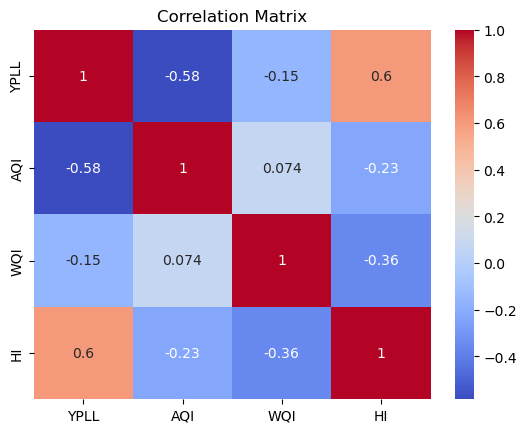

In [10]:
# Visualize relationships
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

<h5>Distribution of Regression Coefficients</h5>
The variability and central tendency of the regression coefficients  were analyzed through density plots. For each predictor, a histogram with a kernel density estimate was plotted to illustrate the distribution of the coefficients across simulations. These plots provide insights into the robustness and uncertainty of the estimated effects of AQI, WQI, and HI on PD. Specifically, the distributions highlight the average impact of each predictor and the range of plausible coefficient values under varying simulated conditions.

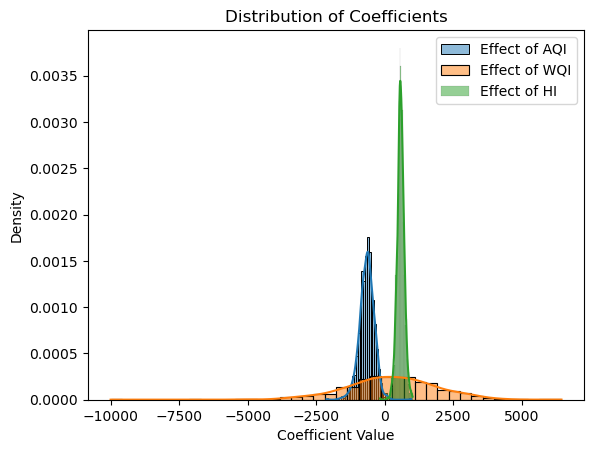

In [12]:
# Visualize distributions of coefficients
for i, var in enumerate(['AQI', 'WQI', 'HI']):
    sns.histplot(results[:, i], kde=True, label=f'Effect of {var}', stat='density')
plt.legend()
plt.title('Distribution of Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Density')
plt.show()

<h3>Results</h3>
The matrix demonstrates moderate to strong correlations, with PD showing the strong positive relationship with HI (0.6). WQI are shown to have weak negative correlation with PD (-0.15), and AQI have a strong negative correlation with PD with the score -0.58. These findings support the hypothesis that environmental factors are interlinked and collectively influence premature mortality, emphasizing the importance of their combined impact.
<br> <br> The distribution plot of regression coefficients highlights the variability and central tendency of the effects of AQI, WQI, and HI on PD across 1,000 Monte Carlo simulations. The mean coefficients for AQI (-645.986), WQI (269.661), and HI (588.912) indicate that AQI has the largest average influence on PD, followed by HI and WQI. The standard deviations of the coefficients (271.603 for AQI, 1623.412 for WQI, and 126.232 for HI) show relatively low variability, suggesting that the relationships are robust across different simulated scenarios. 

<h3>Discussion</h3>
The results of this study has reinstated the significant effect of environmental factors, such as air and water quality and housing conditions, in influencing premature mortality across counties in the United States. The findings from the correlation matrix demonstrate the strong positive correlation between housing issues (HI) and premature mortality (0.6) underscores the pressing need to address inadequate housing conditions, which can exacerbate health risks. Similarly, the negative correlation between air quality (AQI) and premature mortality (-0.58) highlights the substantial impact of air pollution on public health, as poor air quality contributes to respiratory diseases and other life-threatening conditions.
<br> <br> The analysis of regression coefficients further reinforces these insights. The mean coefficient for AQI (-645.986) suggests that improvements in air quality can lead to a significant reduction in premature deaths. On the other hand, the positive mean coefficient for HI (588.912) indicates that worsening housing conditions are associated with increased premature mortality. The smaller but positive coefficient for water quality (WQI: 269.661) implies that addressing water quality violations, while important, may have a relatively lesser impact compared to air quality and housing issues.
<br> <br> These findings have a variety of profound implications for public health and environmental policy and can suggest responsible stakeholders about the initiatives to sustain. First and foremost, improving air quality should be a priority for policymakers and stakeholders, given its strong and consistent association with reduced premature mortality. Water quality, though exhibiting a weaker correlation, remains a crucial aspect of environmental health but can be placed in a latter priority.

<h3>Conclusions</h3>
In conclusion, there is a correlation between AQI, WQI and HI with premature death. The most impactful towards premature death among the 3 variables within Arizona are AQI. However, this does not diminish the importance of the others as HI are the next most significant, with AQI as the next. This shows that the top priority that should be given attention on are on improving the quality of life in order to help people gain the income to afford proper housing and effort on air quality from actions such as regulating factory pollution, general transport, etc. While WQI beeded further investigation due to its weak correlation and high variability in the model.

<h3>Future Directions</h3>
This study acknowledges its limitations in using following Data sources and Monte Carlo simulation as a tool to analyze premature death factors. The study assumes linear relationships between variables, which may oversimplify the interactions between environmental factors and health outcomes. Future research could consider premature death factors that can be found from a sample population of more diverse geographical regions and exploring nonlinear models to enhance the accuracy and applicability of the findings found here.

<h3>Acknowledgements</h3> 
We would like to thank Prof. Daniel and Prof. Johan for teaching us and guiding us throughout this semester, providing us with the needed knowledge of data analysis to develop this project and future interpretations of Data.

<h3>References</h3>
Browning, C.R., Bjornstrom, E.E., & Cagney, K.A. (2011). "Health and Mortality Consequences of the Physical Environment."
<br>
Data & documentation. (n.d.). "County Health Rankings & Roadmaps". https://www.countyhealthrankings.org/health-data/methodology-and-sources/data-documentation"